In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv (r'C:\checkpoint25\kc_house_data.csv' ,sep=',')
df.isnull().sum().sum()  

0

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'most important features'}, xlabel='price', ylabel='Frequency'>

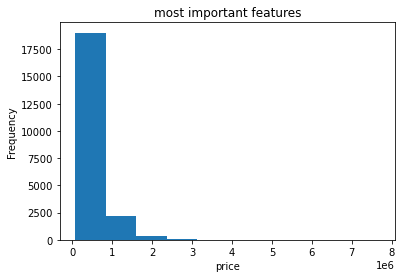

In [9]:
plt.title("most important features")
plt.xlabel("price")
df['price'].plot.hist()
#most frequent houses are those whose price are between 300 and 800 millions

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [55]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
# half of the output variation can be explained by the model's inputs



MSE 62902408306.86502
R squared 0.4996528488387417


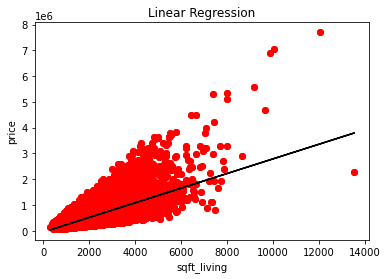

In [39]:
plt.scatter(x,y,color="r")
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()
#the red point are the actual output and the black line that passes by represents our predicted values

In [51]:
x=df[["sqft_living","grade"]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
#more than half of the output variation can be explained by the model's inputs

MSE 57413775762.86427
R squared 0.5433112989852685


In [56]:
from sklearn.preprocessing import PolynomialFeatures 



In [57]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [59]:
x= df[["sqft_living", "grade"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
#more than half of the output variation can be explained by the model's inputs

MSE:  50395735021.3825
R squared:  0.5991351821441399
